In [1]:
#loading data and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic_data = pd.read_csv('train.csv')

In [2]:
titanic_data.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [3]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Count unique values in specific categorical columns
categorical_cols = titanic_data.select_dtypes(include=['object', 'category']).columns
titanic_data[categorical_cols].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [6]:
# Fill missing 'Age' with median of each 'Pclass' group
titanic_data['Age'] = titanic_data['Age'].fillna(
    titanic_data.groupby('Pclass')['Age'].transform('median'))

In [7]:
# Fill missing "Embarked" with its mode
x = titanic_data["Embarked"].mode()[0]  
titanic_data.fillna({"Embarked": x}, inplace=True)

# mode() returns a Series, not a single value, even if there's only one most frequent value. 
# You need to extract the first mode using .mode()[0]

In [8]:
# Drop Cabin column (too many missing values)
titanic_data.drop('Cabin', axis=1, inplace=True)

In [9]:
# Convert Sex to numerical: male → 0, female → 1
titanic_data["Sex"] = titanic_data["Sex"].map({'male': 0, 'female': 1})
# type conversions liek object being used as a string can
# sometimes lead to issues where "male" doesnt equal 'male' so be careful of that

In [10]:
# FamilySize: Sum of Siblings/Spouses Aboard + Parents/Children Aboard + 1
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
# note that .sum() sums the whole column, not just the row

In [11]:
# IsAlone: Binary flag (1 if FamilySize = 1)
titanic_data['IsAlone'] = (titanic_data['FamilySize'] == 1).astype(int)
# titanic_data['FamilySize'] == 1 creates a boolean Series (True/False)
#  .astype(int) converts True to 1 and False to 0

In [12]:
# AgeGroup: Categorical bins (Child: <13, Teen: 13-19, Adult: 20-59, Senior: 60+)
# method 1, works and is very easy to read. 
titanic_data['AgeGroup'] = titanic_data['Age'].apply(
    lambda x: 'Child' if x < 13 else
              'Teen' if 13 <= x < 20 else
              'Adult' if 20 <= x < 60 else
              'Senior'
)
bins = [0, 12, 19, 59, float('inf')]
labels = ['Child', 'Teen', 'Adult', 'Senior']
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=bins, labels=labels, right=False)
# method 2, uses pd.cut() more efficent and handles NaN
# The right=False parameter makes intervals left-closed [a, b)
# Use float('inf') for the upper bound of the last category

In [13]:
# Overall survival rate
total_survival_rate = titanic_data['Survived'].mean()
# Survival rate by gender
survival_by_gender = titanic_data.groupby('Sex')['Survived'].mean()
# Survival rate by passenger class (Pclass)
survival_by_class = titanic_data.groupby('Pclass')['Survived'].mean()
# Survival rate for passengers traveling alone vs. with family
survival_by_family = titanic_data.groupby('IsAlone')['Survived'].mean()

In [14]:
# Top 3 age groups with highest survival rate
top_3_age_groups = (titanic_data.groupby('AgeGroup', observed=True)['Survived']
                      .mean()
                      .sort_values(ascending=False)
                      .head(3))
# or could use: # Calculate survival rate by age group
# survival_by_age_group = titanic_data.groupby('AgeGroup')['Survived'].mean()
# Get top 3 age groups with highest survival rate
# top_3_age_groups = survival_by_age_group.sort_values(ascending=False).head(3)

In [15]:
# Average age by Pclass
average_age_pclass = titanic_data.groupby('Pclass')['Age'].mean()
# Survival rate by pclass
survival_pclass = titanic_data.groupby('Pclass')['Survived'].mean()
# median fare by pclass
median_fare_pclass = titanic_data.groupby('Pclass')['Fare'].median()

<Axes: title={'center': 'Survival Rate by Age Group and Sex'}, xlabel='Age Group', ylabel='Survival Rate'>

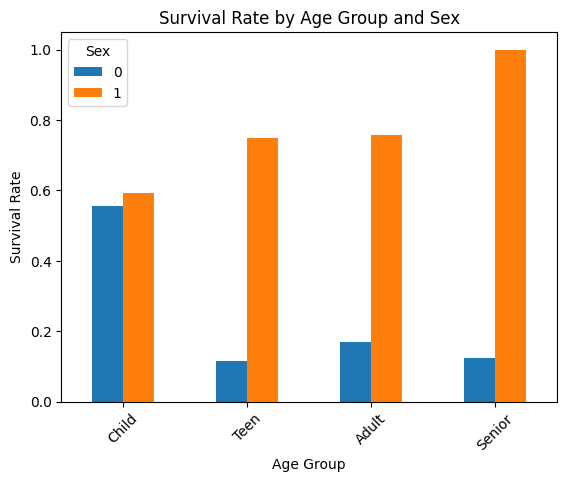

In [16]:
# pivot plot for suvival rate by agegroup and sex
pivot = titanic_data.pivot_table(
    observed=True,
    index="AgeGroup",    # What goes on the left (rows)
    columns="Sex",    # What breaks into columns
    values="Survived",    # What to aggregate
    aggfunc="mean"      # How to aggregate (sum, mean, count, etc.)
)
pivot.plot(
    kind="bar", 
    title="Survival Rate by Age Group and Sex",
    ylabel="Survival Rate",
    xlabel="Age Group",
    rot=45  # Rotate x-axis labels for readability
)

<Axes: title={'center': 'Survival rate by passenger class'}, xlabel='Pclass'>

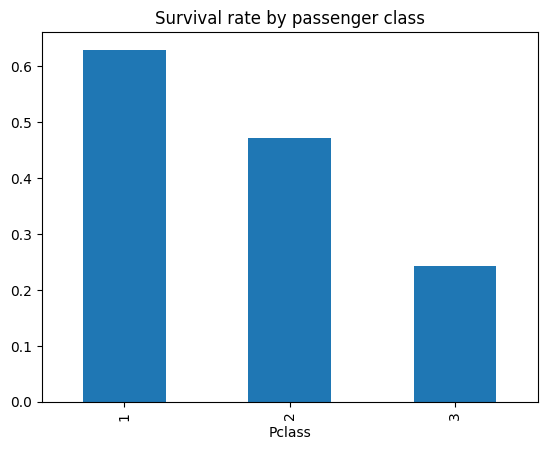

In [17]:
# Bar plot
titanic_data.groupby('Pclass')['Survived'].mean().plot(kind='bar', title='Survival rate by passenger class')

Text(0, 0.5, '')

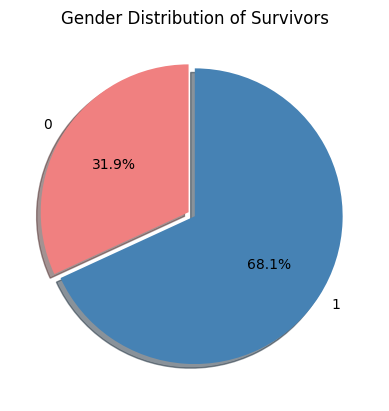

In [18]:
# Pie chart: Gender distribution of survivors
titanic_data[titanic_data['Survived'] == 1].groupby('Sex')['Survived'].sum().plot(
          kind='pie',  # Filter survivors only   # Count survivors by gender
          autopct='%.1f%%',                   # Show percentages
          title='Gender Distribution of Survivors',
          colors=['lightcoral', 'steelblue'],  # Custom colors
          startangle=90,                       # Rotate for better readability
          explode=(0.05, 0),                   # Slightly separate slices
          shadow=True)                         # Add shadow for depth
plt.ylabel('')  # Remove default y-label ("Survived")

([<matplotlib.axis.XTick at 0x115af74d0>,
 [Text(1, 0, 'Died'), Text(2, 0, 'Survived')])

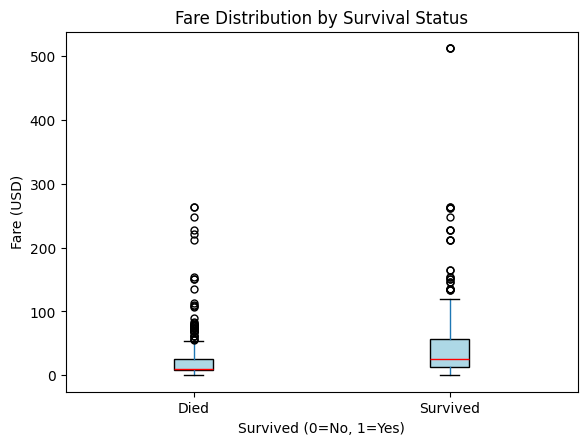

In [19]:
# Box plot: Fare distribution by survival status
titanic_data.boxplot(
    column='Fare', 
    by='Survived',
    grid=False,
    patch_artist=True,  # Color the boxes
    boxprops=dict(facecolor='lightblue'),  # Box color
    medianprops=dict(color='red'),  # Median line color
    flierprops=dict(marker='o', markersize=5)  # Outlier style
)
plt.title('Fare Distribution by Survival Status')
plt.suptitle('')  # Remove default subtitle
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Fare (USD)')
plt.xticks([1, 2], ['Died', 'Survived'])  # Replace 0/1 with labels

In [40]:
# Histogram: Age distribution with KDE curve
# not possible without extra imports like seaborn!

In [22]:
# Save cleaned dataset as titanic_clean.csv
titanic_data.to_csv('titanic_clean.csv', index=False)
# the index=False parameter tells pandas not to write the DataFrame's index (row numbers) into the CSV file

In [28]:
# Export key statistics to Excel with 3 sheets:
# Convert all statistics to DataFrames with clear labels
'''
survival_data = {
    "Overall Survival Rate": [total_survival_rate],
    "Female Survival Rate": [survival_by_gender['female']],
    "Male Survival Rate": [survival_by_gender['male']],
    "1st Class Survival Rate": [survival_by_class[1]],
    "2nd Class Survival Rate": [survival_by_class[2]],
    "3rd Class Survival Rate": [survival_by_class[3]],
    "Alone Passenger Survival Rate": [survival_by_family[1]],  # Assuming 1=IsAlone
    "Family Passenger Survival Rate": [survival_by_family[0]]   # Assuming 0=WithFamily
}

# Create and save DataFrame
pd.DataFrame.from_dict(survival_data, orient='index', columns=['Rate']).to_csv('survival_stats.csv')
# Combine fare stats (transposed for readability)

fare_stats = titanic_data.groupby('Pclass')['Fare'].agg(['mean', 'median'])
fare_describe = titanic_data.groupby('Survived')['Fare'].describe()

# Save each table to separate CSV files
fare_stats.T.to_csv('fare_stats_by_class.csv')  # Transposed: Pclass as columns
fare_describe.T.to_csv('fare_stats_by_survival.csv')  # Transposed for clarity

# Save top 10 fares separately
titanic_data.nlargest(10, 'Fare').to_csv('top_10_fares.csv', index=False)

# Combine demographic stats
demo_stats = pd.concat([
    titanic_data['Sex'].value_counts().rename('Passenger Count by Sex'),
    titanic_data['Pclass'].value_counts().rename('Passenger Count by Class'),
    titanic_data['Age'].describe().rename('Age Distribution')
], axis=1)

demo_stats.to_csv('demographics.csv', index=True)  # Keep index (metric names)
'''

'\nsurvival_data = {\n    "Overall Survival Rate": [total_survival_rate],\n    "Female Survival Rate": [survival_by_gender[\'female\']],\n    "Male Survival Rate": [survival_by_gender[\'male\']],\n    "1st Class Survival Rate": [survival_by_class[1]],\n    "2nd Class Survival Rate": [survival_by_class[2]],\n    "3rd Class Survival Rate": [survival_by_class[3]],\n    "Alone Passenger Survival Rate": [survival_by_family[1]],  # Assuming 1=IsAlone\n    "Family Passenger Survival Rate": [survival_by_family[0]]   # Assuming 0=WithFamily\n}\n\n# Create and save DataFrame\npd.DataFrame.from_dict(survival_data, orient=\'index\', columns=[\'Rate\']).to_csv(\'survival_stats.csv\')\n# Combine fare stats (transposed for readability)\n\nfare_stats = titanic_data.groupby(\'Pclass\')[\'Fare\'].agg([\'mean\', \'median\'])\nfare_describe = titanic_data.groupby(\'Survived\')[\'Fare\'].describe()\n\n# Save each table to separate CSV files\nfare_stats.T.to_csv(\'fare_stats_by_class.csv\')  # Transposed: P